In [2]:
import qutip
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
Delta1 = Delta2 = .3

U_target = qutip.Qobj([[1,0,0,0],
            [0,0,1,0],
            [0,1,0,0],
            [0,0,0,1]])

sigmaz1 = qutip.tensor(qutip.sigmaz(), qutip.qeye(2))
sigmaz2 = qutip.tensor(qutip.qeye(2), qutip.sigmaz())
U_target.dims = sigmaz2.dims

In [5]:
def propagators(A,w,Delta1, Delta2):
    T = 2*np.pi/w; args = {}
    args['A'] = A; args['w'] = w; 
    H0 = -.5 * Delta1 * qutip.tensor(qutip.sigmaz(), qutip.qeye(2)) + -.5 * Delta2 * qutip.tensor(qutip.qeye(2), qutip.sigmaz())
    H1 = -.5 * qutip.tensor(qutip.sigmax(), qutip.sigmax())
    
    def H1_coefficient(t, args):
        A = args['A']; w = args['w']
        coeff = A * np.sin(w*t)
        return coeff
    
    H = [H0, [H1, H1_coefficient]]
    ts = np.linspace(1e-5, T, 50)
    Unumericals = qutip.propagator(H = H,
                                    t = ts,
                                    c_ops = None,
                                    args = args)
    Unum = Unumericals[-1]
    return Unum

def infidelity(Unum, target_gate):
    fid = (Unum.dag() * Unum).tr() + np.abs(((Unum * target_gate.dag()).tr()))**2
    return 1-fid/20

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

Delta1 = .3; Delta2 = .4
amplitude_grid = np.linspace(1e-1, 6, 40); a_list = list(amplitude_grid)
omega_grid = np.linspace(1e-1, 6, 40); w_list = list(omega_grid)

X,Y = np.meshgrid(amplitude_grid, omega_grid, indexing='ij')
errors = [[-np.log(np.real(infidelity(propagators(A = A,
                        w = w,
                        Delta1 = Delta1, Delta2 = Delta2), U_target))) for w in omega_grid] for A in amplitude_grid]

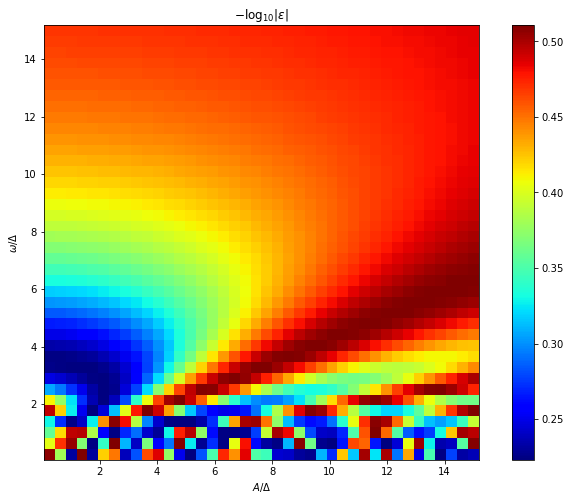

In [9]:
fig1, ax1 = plt.subplots(figsize=(12,8))
pc = ax1.pcolormesh(X/Delta2, Y/Delta2, errors, cmap="jet")
ax1.set_aspect('equal')
plt.title(r'$-\log_{10} |\varepsilon|$')
plt.ylabel(r'$\omega/\Delta$')
plt.xlabel(r'$A/\Delta$')
fig1.colorbar(pc)
plt.show()